<p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='0B5345'> <center>
Práctica 3. Parte 2: Comparación estadística de Energía de señales EEG</center></font></h1>
<font  face="Courier New" size="3">
<p1><center> Angie Triana - Erika Gómez - Ana Carolina Mejía</center></p1>

<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>

In [ ]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 7.2 MB/s eta 0:00:00


In [ ]:
from scipy.fftpack import fft;
import matplotlib.pyplot as plt;
import numpy as np;
import scipy.io as sio;
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import pingouin as pg
import zipfile

In [ ]:
archivo_zip = 'datos_senales_datos_parkinson_cursos.zip'
ruta_destino = './' #La ruta de destino será la misma carpeta
with zipfile.ZipFile(archivo_zip, 'r') as zip_ref: #Se descomprime el archivo
    zip_ref.extractall(ruta_destino)

In [ ]:
import os
directorio_actual=os.getcwd()
print(directorio_actual)

/content


In [ ]:
archivos_control=os.listdir(directorio_actual + "/control") #Se extraen los archivos de la carpeta control.
print("Archivo control contiene la información de",len(archivos_control), "sujetos.") #Se muestra el número de archivos asociados a cada sujeto.

Archivo control contiene la información de 36 sujetos.


In [ ]:
archivos_parkinson=os.listdir(directorio_actual + "/parkinson") #Se extraen los archivos de la carpeta Parkinson.
print("Archivo parkinson contiene la información de",len(archivos_parkinson), "sujetos.")#Se muestra el número de archivos asociados a cada sujeto.

Archivo parkinson contiene la información de 23 sujetos.


In [ ]:
archivos_control[0]

'C027_EP_reposo.mat'

In [ ]:
#ruta de un archivo
path_subjecti=(directorio_actual + "/control" + "/" + archivos_control[0]) #Ahora se carga la ruta de un sujeto control
#1 CARGAR EL ARCHIVO
data = sio.loadmat(path_subjecti)

In [ ]:
data.keys() #Observamos las claves del archivo

dict_keys(['__header__', '__version__', '__globals__', 'data'])

In [ ]:
data = data['data'] #Extraemos la clave donde se encuentran contenidas las señales

In [ ]:
data

array([[[-0.19733569, -2.09579754, -0.35648188, ...,  1.79392397,
         -0.03205237,  0.94145799],
        [-0.30539051, -1.95225132, -0.25310796, ...,  1.67066681,
         -0.06045094,  1.04318798],
        [-0.38547873, -1.77860498, -0.15194905, ...,  1.54098392,
         -0.08349149,  1.12886047],
        ...,
        [-3.46883965, -0.71004272, -1.47101223, ...,  1.43938136,
         -0.89867193,  1.85984898],
        [-3.65418959, -0.72886789, -1.51761782, ...,  1.69920301,
         -0.8058508 ,  1.72896695],
        [-3.81355   , -0.75994068, -1.54595327, ...,  1.97874486,
         -0.72223341,  1.60572612]],

       [[-0.49805999, -1.11634994,  1.12969792, ...,  0.5847261 ,
          0.59966332, -0.19755332],
        [-0.5424971 , -0.98738897,  1.19663715, ...,  0.40993881,
          0.57045984, -0.08915517],
        [-0.57589036, -0.83824211,  1.26319468, ...,  0.23822376,
          0.54242831,  0.01529163],
        ...,
        [-2.29838991,  0.49485981, -0.6675635 , ...,  

In [ ]:
data.shape

(8, 2000, 142)

In [ ]:
data.shape #Miramos su forma para conocer el número de canales, muestras y épocas

(8, 2000, 142)

In [ ]:
print("Variable python: " + str(type(data))); #Miramos el tipo de dato
#características básicas de ndarray
print("Tipo de variable cargada: " + str(data.dtype));
print("Dimensiones de los datos cargados: " + str(data.shape));
print("Numero de dimensiones: " + str(data.ndim));
print("Tamaño: " + str(data.size));
print("Tamaño en memoria (bytes): " + str(data.nbytes));

Variable python: <class 'numpy.ndarray'>
Tipo de variable cargada: float64
Dimensiones de los datos cargados: (8, 2000, 142)
Numero de dimensiones: 3
Tamaño: 2272000
Tamaño en memoria (bytes): 18176000


In [ ]:
#La señal se convierte en continua mediante el comando reshape.
senal_continua=np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]),order="F")
senal_continua.shape

(8, 284000)

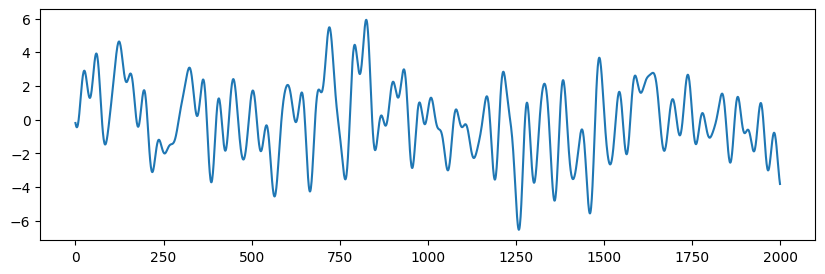

In [ ]:
#Se visualiza la señal continua.
fig=plt.figure(figsize=(10,3))
fig.subplots_adjust(hspace=0.4,wspace=0.4)
plt.plot(senal_continua[0,0:2000])
plt.show()

# **Procedimiento**

## 1. Implemente una función que reciba una señal de múltiples canales y épocas y calcule la Energía de promedio de cada canal.

Se pide que la función reciba una señal que esté organizada en múltiples canales y dividida en épocas, y que luego se calcule la energía de cada canal promediada a lo largo de todas las épocas.

In [ ]:
def energiapromedio(signal): #Recibe una señal con la forma: (Canales, muestras, épocas)
    energia_epoca = np.sum(np.square(signal), axis=1) #Primero se le calcula el cuadrado a todos los elementos de la señal y luego se suman
    energia_promedio = np.mean(energia_epoca, axis=1) #Se calcula el promedio, y se pone axis=1, que corresponde al eje de las épocas.
    return energia_promedio

In [ ]:
energia_promedio = energiapromedio(data) #Prueba
print(f'La energía promedio del sujeto {archivos_control[0]} por épocas de cada canal es: {energia_promedio}')

La energía promedio del sujeto C027_EP_reposo.mat por épocas de cada canal es: [16237.836551   12899.89954443 12386.28471757 12167.85800755
 19279.94175153 57768.54317813 53582.35671669 68859.29887361]


## 2. Calcule la energía de cada canal promediada por épocas para cada sujeto, esto para ambos grupos poblacionales. Guarde esta información en un DataFrame de columnas ‘canal’ y filas ‘#sujeto’ con los valores de energía calculados, un DataFrame para cada grupo poblacional.

In [ ]:
Energia_sujetos={}
archivos_control = os.listdir(directorio_actual + "/control")
print("Número de archivos en control:", len(archivos_control))
# Cargar y procesar los archivos de los sujetos control
for i in range(len(archivos_control)):
    ruta_archivo = os.path.join(directorio_actual + "/control", archivos_control[i])
    data = sio.loadmat(ruta_archivo)
    data = data["data"]
    energia_promedio = energiapromedio(data)
    Energia_sujetos[f'Control {i+1}'] = energia_promedio

Número de archivos en control: 36


In [ ]:
columnas=[f'Canal {i+1}' for i in range(0,8)] #Se establece un rango de acuerdo al número de canales.
df_control = pd.DataFrame.from_dict(Energia_sujetos, orient='index', columns=columnas)

In [ ]:
df_control

,Canal 1,Canal 2,Canal 3,Canal 4,Canal 5,Canal 6,Canal 7,Canal 8
Control 1,9702.573235,8310.599134,11274.177917,7138.981899,10286.070527,16151.490459,15731.296585,20956.719846
Control 2,27406.189072,21049.882057,45082.411879,49492.678794,40225.257438,42301.871711,33188.664449,34157.555662
Control 3,14798.253355,25379.940073,14356.020122,12288.656607,11694.967690,33493.547072,32447.412642,35561.860821
Control 4,23331.449171,21794.167460,20057.059370,18703.362284,21191.204277,91362.046468,60904.241719,53341.328914
Control 5,11197.554574,10948.368805,12737.004665,10745.161921,10329.642418,21461.605831,15493.212776,27414.375247
Control 6,7053.495371,6483.359552,6733.630592,6466.650688,6707.361817,17285.045612,16605.010744,18350.242393
Control 7,17567.465030,21738.511853,29429.308030,28530.200793,24586.407386,73273.828899,68753.985484,67962.795266
Control 8,11920.628977,12381.108138,11545.897906,11616.229122,18658.417865,42058.456657,34417.780679,46167.748438
Control 9,34036.502777,35276.242239,37728.034174,30403.012785,32255.024467,149804.923665,194218.587624,270161.157209
Control 10,45453.734066,42660.225279,44139.445078,50829.933680,59261.694214,253815.983291,214544.090670,247982.671049


In [ ]:
Energia_parkinson={}
archivos_parkinson= os.listdir(directorio_actual + "/parkinson")
print("Número de archivos en control:", len(archivos_parkinson))
# Cargar y procesar los archivos de los sujetos control
for i in range(len(archivos_parkinson)):
    ruta_archivo = os.path.join(directorio_actual + "/parkinson", archivos_parkinson[i])
    data = sio.loadmat(ruta_archivo)
    data = data["data"]
    energia_promedio = energiapromedio(data)
    Energia_parkinson[f'Paciente {i+1}'] = energia_promedio

Número de archivos en control: 23


In [ ]:
df_parkinson = pd.DataFrame.from_dict(Energia_parkinson, orient='index', columns=columnas)

In [ ]:
df_parkinson

,Canal 1,Canal 2,Canal 3,Canal 4,Canal 5,Canal 6,Canal 7,Canal 8
Paciente 1,12157.229828,13398.658526,17668.877657,14841.104693,11297.742247,38701.647608,41828.973929,61328.610990
Paciente 2,33900.139101,32395.467750,29194.827407,23439.114082,25040.406700,122738.018441,103327.500981,100845.843964
Paciente 3,16776.577493,20468.685954,25320.621029,24036.472073,20723.732743,76391.356727,60599.129053,81585.412935
Paciente 4,14532.459483,17860.192841,30120.983497,29569.273094,30054.971601,22088.181162,18262.518633,18454.068489
Paciente 5,32188.312555,31159.578900,32352.266891,28810.929111,25368.624860,59526.213049,66204.132354,69036.969842
Paciente 6,9581.810471,14008.572615,9589.230257,9374.085669,8154.941858,28970.848994,40705.897395,36624.858559
Paciente 7,10930.227074,14670.548632,21623.897909,15449.251169,13471.035295,28974.383402,31469.428045,32535.921202
Paciente 8,48574.518921,51806.529769,73171.952374,59707.699631,56552.175747,287105.761622,222745.793414,353312.298104
Paciente 9,16202.416566,13124.247855,13988.674335,12752.027365,15784.724049,50730.233172,50742.237835,73694.061647
Paciente 10,23742.325612,22070.007569,24540.315612,21803.936448,22594.339745,128314.264805,128888.485633,152799.284248


## 3. Determine si existe diferencia estadística entre canales de cada grupo de sujetos a través de una prueba t. Compruebe los supuestos necesarios para realizar una prueba t, esto es: Normalidad de la variable, independencia (se asume que los grupos son independientes), y homocedasticidad (use una prueba de Levene), finalmente realice la prueba t para determinar si existen diferencias entre los canales entre grupos de sujetos. De no cumplirse los requisitos, realice entonces un análisis no paramétrico (prueba U de Mann-Whitney). Este numeral tiene como objetivo identificar los canales que entregan información diferencial entre pacientes Sanos y con enfermedad de Parkinson.

### Prueba de normalidad Shapiro-Wilks

Para evaluar la normalidad se seleccionó la prueba de Shapiro-Wilks.

El test de Shapiro-Wilks plantea la hipótesis nula de que una muestra proviene de una distribución normal. En este caso, se eligió un nivel de significancia de 0,05, es decir, se acepta un 5% de probabilidad de cometer un error tipo I (rechazar la hipótesis nula cuando esta es verdadera). Si el valor-p es menor o igual al nivel de significancia, entonces se tiene evidencia suficiente para rechazar la hipótesis nula. De lo contrario, se asume que la hipótesis nula es verdadera.

La hipótesis alternativa es que no se sigue una distribución normal.

Hipótesis nula (H0): La señal tiene una distribución es normal.

Hipótesis alternativa (H1): La señal tiene una distribución no es normal.

In [ ]:
df_control.columns

Index(['Canal 1', 'Canal 2', 'Canal 3', 'Canal 4', 'Canal 5', 'Canal 6',
       'Canal 7', 'Canal 8'],
      dtype='object')

In [ ]:
alpha=0.05

In [ ]:
from scipy.stats import shapiro, levene

def Prueba_ShapiroWilks(df, alpha):
    normalidad = {}
    for canal in df.columns:
        stats, p_value = shapiro(df[canal])
        normalidad[canal] = p_value
        if p_value <= alpha:
            print(f'{canal}: p-value = {p_value}. No sigue una distribución normal.')
        elif p_value >= alpha:
            print(f'{canal}: p-value = {p_value}. Sigue una distribución normal.')
    return normalidad

In [ ]:
df_control.columns

Index(['Canal 1', 'Canal 2', 'Canal 3', 'Canal 4', 'Canal 5', 'Canal 6',
       'Canal 7', 'Canal 8'],
      dtype='object')

In [ ]:
shapiro_control = Prueba_ShapiroWilks(df_control, alpha)

Canal 1: p-value = 0.00625258258949084. No sigue una distribución normal.
Canal 2: p-value = 0.003954349672893232. No sigue una distribución normal.
Canal 3: p-value = 0.008902474388641704. No sigue una distribución normal.
Canal 4: p-value = 0.0001969822134533634. No sigue una distribución normal.
Canal 5: p-value = 0.0007995109321301918. No sigue una distribución normal.
Canal 6: p-value = 6.077846333124141e-06. No sigue una distribución normal.
Canal 7: p-value = 4.219023053060484e-06. No sigue una distribución normal.
Canal 8: p-value = 5.307787994214454e-07. No sigue una distribución normal.


In [ ]:
shapiro_parkinson = Prueba_ShapiroWilks(df_parkinson, alpha)

Canal 1: p-value = 0.014391748809352648. No sigue una distribución normal.
Canal 2: p-value = 0.004522125702176838. No sigue una distribución normal.
Canal 3: p-value = 0.0009095814679302174. No sigue una distribución normal.
Canal 4: p-value = 0.00031213125786319976. No sigue una distribución normal.
Canal 5: p-value = 0.005322990592932188. No sigue una distribución normal.
Canal 6: p-value = 9.814695111014217e-06. No sigue una distribución normal.
Canal 7: p-value = 1.6702065098807628e-05. No sigue una distribución normal.
Canal 8: p-value = 8.98335963166538e-06. No sigue una distribución normal.


*Resultados para prueba de normalidad para sujetos sanos*

In [ ]:
df = pd.DataFrame(list(shapiro_control.items()), columns=['Canal', 'p_value'])
df['Normal'] = df['p_value'] > alpha
df.set_index('Canal', inplace=True)
print(df)

              p_value  Normal
Canal                        
Canal 1  6.252583e-03   False
Canal 2  3.954350e-03   False
Canal 3  8.902474e-03   False
Canal 4  1.969822e-04   False
Canal 5  7.995109e-04   False
Canal 6  6.077846e-06   False
Canal 7  4.219023e-06   False
Canal 8  5.307788e-07   False


*Resultados para prueba de normalidad para sujetos con Parkinson*

In [ ]:
df = pd.DataFrame(list(shapiro_parkinson.items()), columns=['Canal', 'p_value'])
df['Normal'] = df['p_value'] > alpha
df.set_index('Canal', inplace=True)
print(df)

          p_value  Normal
Canal                    
Canal 1  0.014392   False
Canal 2  0.004522   False
Canal 3  0.000910   False
Canal 4  0.000312   False
Canal 5  0.005323   False
Canal 6  0.000010   False
Canal 7  0.000017   False
Canal 8  0.000009   False


### Prueba de homocedasticidad - Prueba de Levene



Dado que los canales no siguen una distribución normal, una de las pruebas recomendadas para evaluar la homocedasticidad es la Prueba de Levene.

Si el valor p de la prueba de Levene es superior a 0.05, las varianzas no son significativamente diferentes entre sí (es decir, se cumple el supuesto de homogeneidad de la varianza). Si el valor p de la prueba de Levene es inferior a 0.05, entonces existe una diferencia significativa entre las varianzas.

H0: Los grupos tienen varianzas iguales


H1: Los grupos tienen varianzas diferentes

In [ ]:
from scipy.stats import levene

def Prueba_Levene(df_control, df_pacientes, alpha):
    homocedasticidad={}
    for canal in df_control.columns:
        stat, p_value = levene(df_control[canal], df_pacientes[canal])
        homocedasticidad[canal] = p_value
        if p_value <= alpha:
            print(f'{canal}: p-value = {p_value}. No cumple con el criterio de homocedasticidad.')
        elif p_value > alpha:
            print(f'{canal}: p-value = {p_value}. Cumple con el criterio de homocedasticidad.')
    return homocedasticidad


In [ ]:
homocedasticidad = Prueba_Levene(df_control, df_parkinson, alpha)

Canal 1: p-value = 0.8848020019348577. Cumple con el criterio de homocedasticidad.
Canal 2: p-value = 0.9590926426745954. Cumple con el criterio de homocedasticidad.
Canal 3: p-value = 0.9776337925998679. Cumple con el criterio de homocedasticidad.
Canal 4: p-value = 0.7592528471707682. Cumple con el criterio de homocedasticidad.
Canal 5: p-value = 0.9045548264900758. Cumple con el criterio de homocedasticidad.
Canal 6: p-value = 0.4719758936966435. Cumple con el criterio de homocedasticidad.
Canal 7: p-value = 0.6178759981277944. Cumple con el criterio de homocedasticidad.
Canal 8: p-value = 0.5940765419878595. Cumple con el criterio de homocedasticidad.


*Resultados para prueba de homocedasticidad para sujetos sanos y sujetos con Parkinson*

In [ ]:
df = pd.DataFrame(list(homocedasticidad.items()), columns=['Canal', 'p_value'])
df['Homocedasticidad'] = df['p_value'] > alpha
df.set_index('Canal', inplace=True)
print(df)

          p_value  Homocedasticidad
Canal                              
Canal 1  0.884802              True
Canal 2  0.959093              True
Canal 3  0.977634              True
Canal 4  0.759253              True
Canal 5  0.904555              True
Canal 6  0.471976              True
Canal 7  0.617876              True
Canal 8  0.594077              True


### Prueba para determinar si existen diferencias entre los canales entre grupos de sujetos.

Dado que los datos no cumplen con todos los supuestos requeridos para realizar una T-Test, se realizará una prueba de U-Mann Whitney para realizar un análisis no paramétrico.


Las condiciones que se deben cumplir para que los resultados del u-test sean estrictamente válidos son:

* Los datos tienen que ser independientes.

* Los datos tienen que ser ordinales o bien se tienen que poder ordenarse de menor a mayor.

* No es necesario asumir que las muestras se distribuyen de forma normal o que proceden de poblaciones normales. Sin embargo, para que el test compare medianas, ambas han de tener el mismo tipo de distribución (varianza, asimetría, i.).

* Igualdad de varianza entre grupos (homocedasticidad).

Las hipótesis son:

H0: Los canales no entregan información diferencial estadísticamente significativa entre sujetos sanos y pacientes con la enfermedad de Parkinson.


H1: Los canales entregan información diferencial estadísticamente significativa entre sujetos sanos y pacientes con la enfermedad de Parkinson.

In [ ]:
def U_test(df_control, df_pacientes, alpha):
    resultados_U_test = {}
    for canal in df_control.columns:
        stat, p_value = stats.mannwhitneyu(df_control[canal], df_pacientes[canal], alternative='two-sided')
        resultados_U_test[canal] = p_value
        if p_value <= alpha:
            print(f'{canal}: p-value = {p_value}. El canal entrega información diferencial entre sujetos sanos y con enfermedad de Parkinson.')
        elif p_value >= alpha:
            print(f'{canal}: p-value = {p_value}. El canal no entrega información diferencial entre sujetos sanos y con enfermedad de Parkinson.')
    return resultados_U_test

resultados_U_test = U_test(df_control, df_parkinson, alpha)


Canal 1: p-value = 0.4057005715724912. El canal no entrega información diferencial entre pacientes sanos y con enfermedad de Parkinson.
Canal 2: p-value = 0.5705282028889593. El canal no entrega información diferencial entre pacientes sanos y con enfermedad de Parkinson.
Canal 3: p-value = 0.46037288907343565. El canal no entrega información diferencial entre pacientes sanos y con enfermedad de Parkinson.
Canal 4: p-value = 0.23446184956559823. El canal no entrega información diferencial entre pacientes sanos y con enfermedad de Parkinson.
Canal 5: p-value = 0.5600175059745567. El canal no entrega información diferencial entre pacientes sanos y con enfermedad de Parkinson.
Canal 6: p-value = 0.2800747649284743. El canal no entrega información diferencial entre pacientes sanos y con enfermedad de Parkinson.
Canal 7: p-value = 0.11830081572892007. El canal no entrega información diferencial entre pacientes sanos y con enfermedad de Parkinson.
Canal 8: p-value = 0.15054429358714408. El ca

*Resultado para prueba de U-Mann Whitney para análisis no paramétrico*

In [ ]:
du = pd.DataFrame(list(resultados_U_test.items()), columns=['Canal', 'p_value'])
du['T-Test'] = du['p_value'].apply(lambda p: 'Sí entrega información diferencial.' if p <= alpha else 'No entrega información diferencial.')
du.set_index('Canal', inplace=True)
print(du)

          p_value                               T-Test
Canal                                                 
Canal 1  0.405701  No entrega información diferencial.
Canal 2  0.570528  No entrega información diferencial.
Canal 3  0.460373  No entrega información diferencial.
Canal 4  0.234462  No entrega información diferencial.
Canal 5  0.560018  No entrega información diferencial.
Canal 6  0.280075  No entrega información diferencial.
Canal 7  0.118301  No entrega información diferencial.
Canal 8  0.150544  No entrega información diferencial.


# **Análisis**

Al realizar la prueba de normalidad (Shapiro-Wilks) se observó que tanto las señales de sujetos sanos como aquellos con Parkinson no siguen una distribución normal. Esto se debe a que las señales EEG no se distribuyen de manera simétrica al tener un alto grado de complejidad debido a que son señales estocásticas que presentan variaciones significativas dependiendo de la ubicación del electrodo y la zona estudiada. Asimismo, la falta de normalidad se puede deberse a factores como la presencia de ruido por artefactos exteriores, electrodos de mala calidad, movimientos de ojos, contracciones musculares y principalmente las oscilaciones de las bandas de frecuencia (delta, theta, alfa, beta, gamma) que se diferenciarse según la región cerebral, los niveles de concentración y la presencia de trastornos neurologicos como el Parkinson [1]. En particular, la banda beta muestra una actividad anormalmente elevada en pacientes con Parkinson, contribuyendo significativamente a la desviación de la normalidad en las señales estudiadas [2].

La prueba de Levene indicó que todos los canales presentan homocedasticidad, es decir, las varianzas entre grupos mantienen una homogeneidad. Sin embargo, debido a la ausencia de una distribución normal en estos, no fue posible utilizar la prueba T. En su lugar, se realizó un análisis no paramétrico mediante la prueba U de Mann-Whitney. Este análisis manifestó que ninguno de los canales mostró información diferencial entre los sujetos sanos y aquellos con Parkinson. Este resultado no fue el esperado, ya que se anticipaban diferencias fisiológicas debido a la patología, que podían ser captadas a través de las señales EEG.  Sin embargo, este comportamiento podría explicarse por factores como: datos insuficientes o de baja calidad, debido al uso de un número limitado de canales (8 electrodos) en el análisis. En estudios similares, se emplean hasta 19 electrodos activos para obtener información más completa de diversas zonas de la corteza cerebral y capturar de manera más precisa los efectos representativos de la enfermedad Parkinson [3]. Por otro lado, un preprocesamiento inadecuado de las señales puede afectar la comparación entre los canales. La interferencia de señales no deseadas, como el ECG, es un problema común. Esta interferencia puede introducir picos agudos que complican la diferenciación, afectando la calidad del análisis [4].






# **Conclusiones**

* Los canales empleados para el análisis no mostraron diferencias significativas entre los sujetos control y los sujetos con la enfermedad de Parkinson, lo que podría indicar que para las señales analizadas no se puede asumir que afecten de manera diferenciada estos canales, puesto que no hay una variación que permita distinguir entre los dos grupos. Podrían explorarse otros parámetros o explorar otras métricas de la señal para las cuales se haya reportado una mayor sensibilidad para captar estas diferencias.

*  La complejidad de los estudios de EEG subraya la importancia de utilizar nuevos métodos para analizar su distribución, especialmente en contextos clínicos como la investigación del Parkinson.

* Los resultados podrían mejorarse añadiendo más canales, lo que proporcionaría más información y aumentaría la potencia estadística, permitiendo un análisis más detallado de las diferencias entre el grupo control y el grupo con Parkinson. Sin embargo, esto conlleva el riesgo de aumentar el ruido en los datos, que podría mitigarse con el uso de filtros adecuados.


# **Referencias**  

[1] L. Gómez, “Análisis de señales EEG para detección de eventos oculares, musculares y cognitivos”, Trabajo fin de máster, Univ. Politec. Madr., Madrid, 2016. [En línea]. Disponible: https://oa.upm.es/44379/1/TFM_LEONARDO_JOSE_GOMEZ_FIGUEROA.pdf

[2] E. Querejeta Villagómez, Alfa, omega y beta del Parkinson. Ciudad de México: Inst. Politec. Nac., 2018. [En línea]. Disponible: https://www.ipn.mx/assets/files/bibliotecas-publicaciones/docs/publicaciones/libros/mb-parkinson.pdf

[3] S. Berrillo, L. Morales, I. Pedroso, A. Peláez, A. Sanchez y M. Alfonso, “Conectividad funcional derivada del electroencefalograma en la enfermedad de Parkinson sin demencia”, Rev. Cuba. Neurol. Neurocir., vol. 12, n.º 1, 2022.

[4] Y. Rodríguez, T. Gonzáles, E. Marañon, A. Montoya y F. Sanabria, “Aplicación de la corrección de artefactos en el electroencefalograma para el monitoreo del estado anestésico”, Rev Cuba. Neurol Neurocir, vol. 5, n.º 1, pp. 9–14, 2015.